# Microsoft Movie Maker Project
By: Ferdinand Beaman
* Student pace: part time
* Scheduled project review date/time: ?
* Instructor name: Abhineet Kulkarni
* Blog post URL: ?



## Project Goal

The goal of this project is to inform Microsoft of what factors will help their first movie a success.


### Data Source and Exploration
The data I used came primarily from [imdb.com](https://www.imdb.com/) and [the-numbers.com](https://www.the-numbers.com/). These websites have information about:
* titles, both domestic and international
* release dates
* cast and crew
* runtime
* budgets
* and gross ticket sales, both domestic and international

Sifting through this data, I believe that I'm able to demonstrate that an animated sci-fi adventure directed by Ryan Coogler would be a project with enormous potential in terms of "return on investment".

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob

In [2]:
#Grabbing the data
csv_files = glob("./zippedData/*.csv.gz")
csv_files

csv_files_dict = {}
for filename in csv_files:
        filename_cleaned = os.path.basename(filename).replace(".csv", "").replace(".", "_")
        filename_df = pd.read_csv(filename, index_col=0)
        csv_files_dict[filename_cleaned] = filename_df

(Since my primary goal is to see what movies are profitable and not necessarily what makes movies well-reviewed, I'm ignoring the ratings-related tsv files).

In [3]:
#Just listing the files I have access to.
csv_files_dict.keys()

dict_keys(['imdb_title_crew_gz', 'tmdb_movies_gz', 'imdb_title_akas_gz', 'imdb_title_ratings_gz', 'imdb_name_basics_gz', 'imdb_title_basics_gz', 'tn_movie_budgets_gz', 'bom_movie_gross_gz', 'imdb_title_principals_gz'])

After sifting through, "tn_movie_budgets_gz" (from the-numbers.com) seemed like a good baseline. It is where I'll be getting my worldwide gross, budgets, and release date.


# Lining the numbers up

The data from "the-numbers" unsurprisingly has all of the numerical data I need to build everything off of. But it's not ready just yet. 

So in this section, we turn those raw figures into something more useful

In [4]:
#Starting with "the-numbers"
numbers = csv_files_dict["tn_movie_budgets_gz"]
numbers

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...
78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"


The next step was to convert certain information into integers...

In [5]:
#Making a dedicated "year" column
numbers["year"] = numbers["release_date"].map(lambda x: x[slice(7,12)]).replace(" ", "").map(lambda x: int(x))

#Turning budget and gross into integers
numbers["budget"] = numbers["production_budget"].map(lambda x: x.replace("$", "")).map(lambda x: x.replace(",","")).map(lambda x: int(x))

numbers["world_gross"] = numbers["worldwide_gross"].map(lambda x: x.replace("$", "")).map(lambda x: x.replace(",","")).map(lambda x: int(x))

... so I can create two new columns: "Net profit" and "ROI", created by subtracting and dividing the world_gross and budget columns respectively.

In [6]:
numbers["net_profit"] = numbers["world_gross"] - numbers["budget"]
numbers["roi"] = numbers["world_gross"] / numbers["budget"]

I should also make sure that there are no duplicate entries in my data.

In [7]:
#Movies are often rebooted years later. So different years are ignored.
numbers.drop_duplicates(subset=["movie", "year"])

,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,budget,world_gross,net_profit,roi
id,,,,,,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",2009,425000000,2776345279,2351345279,6.532577
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",2011,410600000,1045663875,635063875,2.546673
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",2019,350000000,149762350,-200237650,0.427892
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",2015,330600000,1403013963,1072413963,4.243841
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",2017,317000000,1316721747,999721747,4.153696
...,...,...,...,...,...,...,...,...,...,...
78,"Dec 31, 2018",Red 11,"$7,000",$0,$0,2018,7000,0,-7000,0.000000
79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495",1999,6000,240495,234495,40.082500
80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338",2005,5000,1338,-3662,0.267600


In [8]:
#Whittling down to the relevant columns
data1 = numbers[["movie", "year", "budget", "world_gross", "net_profit", "roi"]].copy()
data1

,movie,year,budget,world_gross,net_profit,roi
id,,,,,,
1,Avatar,2009,425000000,2776345279,2351345279,6.532577
2,Pirates of the Caribbean: On Stranger Tides,2011,410600000,1045663875,635063875,2.546673
3,Dark Phoenix,2019,350000000,149762350,-200237650,0.427892
4,Avengers: Age of Ultron,2015,330600000,1403013963,1072413963,4.243841
5,Star Wars Ep. VIII: The Last Jedi,2017,317000000,1316721747,999721747,4.153696
...,...,...,...,...,...,...
78,Red 11,2018,7000,0,-7000,0.000000
79,Following,1999,6000,240495,234495,40.082500
80,Return to the Land of Wonders,2005,5000,1338,-3662,0.267600



## Getting the genre information

What kind of movie should someone make? When asked this question, I would bet that most people's first instinct is to assume that the answer is a genre.

First, a snag: each file that contained genre data (tmdb_movies_gz and imdb_title_basics_gz) had *two* columns for the movies' names.

So, using the "Saw" movies as a test...

In [9]:
#Titles on imdb
imdb_titles = csv_files_dict["imdb_title_basics_gz"]
imdb_titles[imdb_titles["original_title"].fillna(value="?").str.startswith("Saw ")]

,primary_title,original_title,start_year,runtime_minutes,genres
tconst,,,,,
tt1477076,Saw 3D: The Final Chapter,Saw 3D,2010,90.0,"Crime,Horror,Mystery"
tt2582064,Saw - La mécanique de l'extrême,Saw - La mécanique de l'extrême,2012,NaN,Documentary


In [10]:
#Titles on tmdb
tmdb_movies = csv_files_dict["tmdb_movies_gz"]
tmdb_movies[tmdb_movies["original_title"].str.startswith("Saw ")]

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
14,"[27, 80]",41439,en,Saw 3D,20.37,2010-10-28,Saw: The Final Chapter,6.0,1488


In [11]:
#Comparing to the dataframe I created from The Numbers
saw_movies = data1[data1["movie"].str.startswith("Saw 3D")]
saw_movies

,movie,year,budget,world_gross,net_profit,roi
id,,,,,,
79,Saw 3D,2010,17000000,133735284,116735284,7.866781


...you can see that the "original_title" column from both tmdb and imdb match with what I have from the-numbers.

Conveniently, IMDB already has its genres in readable English instead of coded IDs. So I performed an inner merge between IMDB's data and mine.

In [12]:
imdb_titles = imdb_titles.rename(columns={'original_title': 'movie'})
data1_imdb_interim = data1.merge(imdb_titles, how='inner', on="movie")
#dropping more unnecessary columns
data1_imdb = data1_imdb_interim.drop(["primary_title", "start_year"], axis=1)
data1_imdb

,movie,year,budget,world_gross,net_profit,roi,runtime_minutes,genres
0,Pirates of the Caribbean: On Stranger Tides,2011,410600000,1045663875,635063875,2.546673,136.0,"Action,Adventure,Fantasy"
1,Dark Phoenix,2019,350000000,149762350,-200237650,0.427892,113.0,"Action,Adventure,Sci-Fi"
2,Avengers: Age of Ultron,2015,330600000,1403013963,1072413963,4.243841,141.0,"Action,Adventure,Sci-Fi"
3,Avengers: Infinity War,2018,300000000,2048134200,1748134200,6.827114,149.0,"Action,Adventure,Sci-Fi"
4,Justice League,2017,300000000,655945209,355945209,2.186484,120.0,"Action,Adventure,Fantasy"
...,...,...,...,...,...,...,...,...
3532,Cure,2001,10000,94596,84596,9.459600,NaN,NaN
3533,Bang,1996,10000,527,-9473,0.052700,NaN,NaN
3534,Newlyweds,2012,9000,4584,-4416,0.509333,95.0,"Comedy,Drama"
3535,Red 11,2018,7000,0,-7000,0.000000,77.0,"Horror,Sci-Fi,Thriller"



### Narrowing my scope

Some movies are going to be too old or too small for our purposes.

In both cases it's somewhat arbitrary where lines should be drawn.

For age, I just looked year by year and used my best judgment. (I also asked one person for an opinion; she landed on the year after I did). So is the year that has "127 Hours", "The Social Network" and "Inception" close enough to be considered relevant? What about "Drive", "Limitless", and "Captain America" (the *first* one)? Those are 2010 and 2011. Maybe, maybe not.

But 2012 has "The Avengers". I still see critics and friends say "ever since the Avengers" in the same way they say "ever since The Matrix". That right there feels like the start of an era to me. The Dark knight trilogy came to an end that year too, and the age of Christopher Nolan dominating the culture has the feel of yesteryear. All in all, 2012 seems good enough to me.

For size (budget), I start with the knowledge that "The Blair Witch Project" famously made more money compared to its budget than any other movie in history. Adjusting for inflation, about a half-million was spent to produce it. So $500,000 was my first attempt at a lower bound.

In [13]:
#Dropping old movies
new_data = data1_imdb[data1_imdb["year"] > 2011].drop_duplicates(subset = ["movie", "year"])

In [14]:
#Dropping small-budget movies
df = new_data[new_data["budget"] >= 500000]
df.tail(15)

,movie,year,budget,world_gross,net_profit,roi,runtime_minutes,genres
3353,Detention of the Dead,2013,500000,1778,-498222,0.003556,87.0,"Action,Adventure,Comedy"
3354,Higher Power,2018,500000,528,-499472,0.001056,93.0,"Action,Sci-Fi,Thriller"
3357,Enter Nowhere,2012,500000,0,-500000,0.000000,90.0,"Mystery,Sci-Fi,Thriller"
3358,Girls Gone Dead,2012,500000,0,-500000,0.000000,104.0,"Comedy,Horror"
3359,The Outrageous Sophie Tucker,2015,500000,0,-500000,0.000000,96.0,Documentary
3360,Subconscious,2015,500000,0,-500000,0.000000,72.0,Horror
3362,Roadside,2015,500000,0,-500000,0.000000,90.0,"Drama,Horror,Mystery"
3363,Diamond Ruff,2014,500000,0,-500000,0.000000,82.0,Action
3364,Love in the Time of Monsters,2015,500000,0,-500000,0.000000,97.0,"Comedy,Horror"
3365,El rey de Najayo,2012,500000,0,-500000,0.000000,101.0,"Crime,Drama"


Wow. That's a lot of movies that didn't amount to anything. Let's raise the lower bound to $700,000.

In [15]:
df = new_data[new_data["budget"] >= 700000]
df.tail(10)

,movie,year,budget,world_gross,net_profit,roi,runtime_minutes,genres
3268,Le bonheur d'Elza,2015,900000,0,-900000,0.000000,78.0,Drama
3271,Windsor Drive,2015,850000,3256,-846744,0.003831,90.0,"Mystery,Thriller"
3273,Not Cool,2014,800000,35688,-764312,0.044610,93.0,"Comedy,Drama,Romance"
3274,Kill List,2012,800000,462206,-337794,0.577758,95.0,"Crime,Drama,Horror"
3275,Vessel,2015,800000,0,-800000,0.000000,NaN,"Drama,Horror"
3280,Safety Not Guaranteed,2012,750000,4422318,3672318,5.896424,86.0,"Comedy,Drama,Romance"
3281,The Innkeepers,2012,750000,1011535,261535,1.348713,101.0,"Drama,Horror,Mystery"
3283,Destiny,2014,750000,450,-749550,0.000600,NaN,Action
3288,Columbus,2017,700000,1110511,410511,1.586444,127.0,Comedy
3291,Walter,2015,700000,0,-700000,0.000000,NaN,Thriller


At least there are movies here that made their money back. So 700,000 it is.

One last thing: Tmdb did have language information. I may find this useful later in case there are big directors in foreign markets I need to account for.

(Note from the future: I didn't)

In [16]:
#Isolating the language column
#tmdb_lang = tmdb_movies.drop(["id", "genre_ids", "popularity", "release_date", "title", "vote_average", "vote_count"], axis=1)
#tmdb_lang

In [17]:
#Merging, dropping duplicates
#df1 = df.merge(tmdb_lang, how='left', on="movie")
#df2 = df1.drop_duplicates(subset = ["movie", "year"])
#df2.shape


## Making genre columns

This was a little hard to do since I forgot about the "set()" function. Meaning I had to skim the 1300 movies by hand and write down every genre I found. 

No big deal.

In [18]:
#Creating the list of genres...
genres = ['Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Sport',
 'Thriller',
 'War',
 'Western']
#...and making empty columns for each, with default values set to zero. 
for x in genres:
    df[x] = 0
df

<ipython-input-18-44d6e27939d1>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[x] = 0


,movie,year,budget,world_gross,net_profit,roi,runtime_minutes,genres,Action,Adventure,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
1,Dark Phoenix,2019,350000000,149762350,-200237650,0.427892,113.0,"Action,Adventure,Sci-Fi",0,0,...,0,0,0,0,0,0,0,0,0,0
2,Avengers: Age of Ultron,2015,330600000,1403013963,1072413963,4.243841,141.0,"Action,Adventure,Sci-Fi",0,0,...,0,0,0,0,0,0,0,0,0,0
3,Avengers: Infinity War,2018,300000000,2048134200,1748134200,6.827114,149.0,"Action,Adventure,Sci-Fi",0,0,...,0,0,0,0,0,0,0,0,0,0
4,Justice League,2017,300000000,655945209,355945209,2.186484,120.0,"Action,Adventure,Fantasy",0,0,...,0,0,0,0,0,0,0,0,0,0
5,Spectre,2015,300000000,879620923,579620923,2.932070,148.0,"Action,Adventure,Thriller",0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3280,Safety Not Guaranteed,2012,750000,4422318,3672318,5.896424,86.0,"Comedy,Drama,Romance",0,0,...,0,0,0,0,0,0,0,0,0,0
3281,The Innkeepers,2012,750000,1011535,261535,1.348713,101.0,"Drama,Horror,Mystery",0,0,...,0,0,0,0,0,0,0,0,0,0
3283,Destiny,2014,750000,450,-749550,0.000600,NaN,Action,0,0,...,0,0,0,0,0,0,0,0,0,0
3288,Columbus,2017,700000,1110511,410511,1.586444,127.0,Comedy,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
#A function to automate the process of labeling a movie with its genre.
def is_genre(genre):
    df.loc[(df.genres.str.contains(genre)), genre]=1
    return df

I will not pretend to know why, but I have to turn all my NaN genre's into dummy data as well.

In [20]:
#The above function won't function with NaNs... for some reason
df["genres"].fillna(value = "?", inplace = True)

/Users/ferdi/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [21]:
#Creating my dataframe
for x in genres:
    is_genre(x)
df

/Users/ferdi/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


,movie,year,budget,world_gross,net_profit,roi,runtime_minutes,genres,Action,Adventure,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
1,Dark Phoenix,2019,350000000,149762350,-200237650,0.427892,113.0,"Action,Adventure,Sci-Fi",1,1,...,0,0,0,0,0,1,0,0,0,0
2,Avengers: Age of Ultron,2015,330600000,1403013963,1072413963,4.243841,141.0,"Action,Adventure,Sci-Fi",1,1,...,0,0,0,0,0,1,0,0,0,0
3,Avengers: Infinity War,2018,300000000,2048134200,1748134200,6.827114,149.0,"Action,Adventure,Sci-Fi",1,1,...,0,0,0,0,0,1,0,0,0,0
4,Justice League,2017,300000000,655945209,355945209,2.186484,120.0,"Action,Adventure,Fantasy",1,1,...,0,0,0,0,0,0,0,0,0,0
5,Spectre,2015,300000000,879620923,579620923,2.932070,148.0,"Action,Adventure,Thriller",1,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3280,Safety Not Guaranteed,2012,750000,4422318,3672318,5.896424,86.0,"Comedy,Drama,Romance",0,0,...,0,0,0,0,1,0,0,0,0,0
3281,The Innkeepers,2012,750000,1011535,261535,1.348713,101.0,"Drama,Horror,Mystery",0,0,...,1,0,0,1,0,0,0,0,0,0
3283,Destiny,2014,750000,450,-749550,0.000600,NaN,Action,1,0,...,0,0,0,0,0,0,0,0,0,0
3288,Columbus,2017,700000,1110511,410511,1.586444,127.0,Comedy,0,0,...,0,0,0,0,0,0,0,0,0,0


Voila


## Getting the Directors

Directors make or break a movie more than any actor. In my opinion.

To get the directors matched with their movies, however, requires a bit of work.

In [22]:
#The dataset that contains the actual names of the directors
imdb_name = csv_files_dict["imdb_name_basics_gz"]
#Separating directors from other professions
directors = imdb_name[imdb_name["primary_profession"].fillna(value="?").str.contains("director")]
#Making what seems like everyone's IDs a column I can interact with
directors.reset_index(inplace = True)
directors

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0062879,Ruel S. Bayani,NaN,NaN,"director,production_manager,miscellaneous","tt2590280,tt0352080,tt0216559,tt2057445"
1,nm0064023,Bryan Beasley,NaN,NaN,"director,producer,writer","tt3501180,tt1485100,tt1358897,tt1387162"
2,nm0066163,Arnaud Bedouët,NaN,NaN,"actor,writer,director","tt1355327,tt1977735,tt0173525,tt1710520"
3,nm0066268,Steve Mitchell Beebe,NaN,NaN,"editorial_department,director,editor","tt0827928,tt0119961,tt0408417,tt5521860"
4,nm0068170,Dylan Bell,NaN,NaN,"director,actor,producer","tt4655766,tt3180116,tt8170168,tt4082762"
...,...,...,...,...,...,...
146028,nm9971456,Zheng Wei,NaN,NaN,director,NaN
146029,nm9978371,Zach Campbell,NaN,NaN,"actor,cinematographer,assistant_director",NaN
146030,nm9980896,Rama Narayanan,NaN,NaN,"director,writer","tt10127906,tt8715016,tt8919136,tt8929818"
146031,nm9981679,Samir Eshra,NaN,NaN,"director,writer,cinematographer",NaN


But there aren't any movies written here. Just title IDs.

Title IDs are only directly associated with their titles in another file.

In [23]:
#The dataset that matches title_id to the actual title
titles_all = csv_files_dict["imdb_title_akas_gz"]
#Filtering out titles given to foreign releases, dropping irrelevant columns
titles = titles_all[titles_all["is_original_title"] ==
                    1.0].drop(["region", "language", "types", "attributes", 
                               "is_original_title", "ordering"], axis = 1)

In [24]:
titles.head(5)

,title
title_id,
tt0369610,Jurassic World
tt0401729,John Carter
tt10010134,Versailles Rediscovered - The Sun King's Vanis...
tt10027708,Miguelito - Canto a Borinquen
tt10050722,Thing I Don't Get


The index column there is actually the IDs of the movies.

In [25]:
#This dataset pairs a director's ID with a movie's ID
crew = csv_files_dict["imdb_title_crew_gz"]
crew

,directors,writers
tconst,,
tt0285252,nm0899854,nm0899854
tt0438973,NaN,"nm0175726,nm1802864"
tt0462036,nm1940585,nm1940585
tt0835418,nm0151540,"nm0310087,nm0841532"
tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943
...,...,...
tt8999974,nm10122357,nm10122357
tt9001390,nm6711477,nm6711477
tt9001494,"nm10123242,nm10123248",NaN


So these three datasets have one piece of a puzzle each. One has a director's ID with their movie's ID. One has a movie's ID matched with its title. And the other has a director's ID matched with their name.

So they need to come together.

In [26]:
#Creating a dictionary which will allow me to map IDs to Directors
keys = directors["nconst"]
values = directors["primary_name"]
direct_dict = dict(zip(keys, values))
direct_dict

{'nm0062879': 'Ruel S. Bayani',
 'nm0064023': 'Bryan Beasley',
 'nm0066163': 'Arnaud Bedouët',
 'nm0066268': 'Steve Mitchell Beebe',
 'nm0068170': 'Dylan Bell',
 'nm0068874': 'Hava Kohav Beller',
 'nm0070482': 'Joel Bender',
 'nm0070822': 'Terry Benedict',
 'nm0075049': 'Urban Bergsten',
 'nm0075666': 'Joe Berlinger',
 'nm0077067': 'Jamie Bernstein',
 'nm0080787': 'Dusty Bias',
 'nm0081133': 'Adrienne Biddle',
 'nm0081516': 'Ric Esther Bienstock',
 'nm0081702': 'Claudio Bigagli',
 'nm0082154': 'Miro Bilbrough',
 'nm0083767': 'Fernando Birri',
 'nm0085316': 'James Black',
 'nm0086051': 'Bob Blagden',
 'nm0087595': 'Jamie Blanks',
 'nm0087933': 'Jacek Blawut',
 'nm0088531': 'Ryan Bliss',
 'nm0088888': 'Eric Blom',
 'nm0089850': 'Lars Blumers',
 'nm0090847': 'Roberto Bodegas',
 'nm0092526': 'David Christopher Loya',
 'nm0093284': 'Aleksandr Bokovikov',
 'nm0093674': 'Arcangelo Bonaccorso',
 'nm0094612': 'Daryl Bonilla',
 'nm0094754': 'Emmanuelle Bonmariage',
 'nm0094756': 'Manu Bonmariage

Mapping this dictionary onto the other dataframe will lose any movies with multiple directors.

At first I thought movies with multiple directors were rare, but then I remembered that... 

In [27]:
#First look at the output of this cell. Then run this cell again.
#It feels like I coded my first magic trick.
crew.loc["tt4154756"]

directors                                  nm0751577,nm0751648
writers      nm1321655,nm1321656,nm0498278,nm0456158,nm0800...
Name: tt4154756, dtype: object

....The Russo *brothers* co-directed "Avengers: Infinity War" and "Avengers: Endgame". 

Maybe you've heard of them, considering these movies account for 40% of the top 5 highest grossing films of all time.

So I have to add one additional Key:Value pair by hand.

In [28]:
direct_dict["nm0751577,nm0751648"] = "The Russos"

In [29]:
#And now we can proceed with overriding IDs with names
crew["directors"] = crew["directors"].map(direct_dict)

In [30]:
#Making a column for merging purposes
crew["movie"] = crew.index
crew.head()

,directors,writers,movie
tconst,,,
tt0285252,Tony Vitale,nm0899854,tt0285252
tt0438973,NaN,"nm0175726,nm1802864",tt0438973
tt0462036,Bill Haley,nm1940585,tt0462036
tt0835418,Jay Chandrasekhar,"nm0310087,nm0841532",tt0835418
tt0878654,NaN,nm0284943,tt0878654


In [31]:
#Making a column for merging purposes
titles["title_id"] = titles.index
titles.head()

,title,title_id
title_id,,
tt0369610,Jurassic World,tt0369610
tt0401729,John Carter,tt0401729
tt10010134,Versailles Rediscovered - The Sun King's Vanis...,tt10010134
tt10027708,Miguelito - Canto a Borinquen,tt10027708
tt10050722,Thing I Don't Get,tt10050722


In [32]:
#Creating a dictionary that will map titles to title IDs, 
#like what was done with directors
keys = titles["title_id"]
values = titles["title"]
title_dict = dict(zip(keys, values))
title_dict

{'tt0369610': 'Jurassic World',
 'tt0401729': 'John Carter',
 'tt10010134': "Versailles Rediscovered - The Sun King's Vanished Palace",
 'tt10027708': 'Miguelito - Canto a Borinquen',
 'tt10050722': "Thing I Don't Get",
 'tt10121294': 'This Jelly Doughnut Feeling',
 'tt1014759': 'Alice in Wonderland',
 'tt10214198': 'Gou yan kan ren xin',
 'tt10225354': 'Volviendo a Casa',
 'tt10225420': 'El Universo En Que Te Amé',
 'tt10308634': 'My First Client',
 'tt10351180': 'BadBoy',
 'tt10379338': 'Guys Night Out',
 'tt10446418': 'Icon',
 'tt1179034': 'From Paris with Love',
 'tt1182315': 'Negro Buenos Aires',
 'tt1194173': 'The Bourne Legacy',
 'tt1210047': 'Snatched!',
 'tt1219289': 'Limitless',
 'tt1220221': 'Motherland',
 'tt1223236': 'African Cats',
 'tt1227927': 'Caller ID',
 'tt1233259': 'El Capitán Trueno y el Santo Grial',
 'tt1235522': 'Broken City',
 'tt1252507': 'The Way Home',
 'tt1259520': 'Bon appétit',
 'tt1263750': 'Habitación en Roma',
 'tt1272039': 'Un Lío en Dólares',
 'tt12

In [33]:
#Mapping just like before
crew["movie"] = crew["movie"].map(title_dict)
crew.head()

,directors,writers,movie
tconst,,,
tt0285252,Tony Vitale,nm0899854,Life's a Beach
tt0438973,NaN,"nm0175726,nm1802864",NaN
tt0462036,Bill Haley,nm1940585,NaN
tt0835418,Jay Chandrasekhar,"nm0310087,nm0841532",The Babymakers
tt0878654,NaN,nm0284943,Bulletface


And just to be absolutely sure it all worked out I tested this:

In [34]:
crew[crew["movie"].fillna(value="?").str.contains("Avengers")]

,directors,writers,movie
tconst,,,
tt2395427,Joss Whedon,"nm0923736,nm0498278,nm0456158,nm0800209,nm4160687",Avengers: Age of Ultron
tt4154756,The Russos,"nm1321655,nm1321656,nm0498278,nm0456158,nm0800...",Avengers: Infinity War
tt4154796,The Russos,"nm1321655,nm1321656,nm0498278,nm0456158,nm4160687",Avengers: Endgame
tt0848228,Joss Whedon,"nm0923736,nm0672015",The Avengers


Great. Now to zip it all together...

In [35]:
df2 = df.merge(crew, how='left', on="movie").drop_duplicates(subset=["movie", "year"])

...and rearrange things a bit so the most important stuff is in the front.

In [36]:
df2 = df2[['movie','directors','budget', 'world_gross', 'net_profit',
 'roi', 'runtime_minutes', 'year', 'genres', 'Action','Adventure',
 'Animation', 'Biography', 'Comedy','Crime', 'Documentary', 'Drama', 'Family',
 'Fantasy', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'Romance',
 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western']]
df2

,movie,directors,budget,world_gross,net_profit,roi,runtime_minutes,year,genres,Action,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,Dark Phoenix,Simon Kinberg,350000000,149762350,-200237650,0.427892,113.0,2019,"Action,Adventure,Sci-Fi",1,...,0,0,0,0,0,1,0,0,0,0
1,Avengers: Age of Ultron,Joss Whedon,330600000,1403013963,1072413963,4.243841,141.0,2015,"Action,Adventure,Sci-Fi",1,...,0,0,0,0,0,1,0,0,0,0
2,Avengers: Infinity War,The Russos,300000000,2048134200,1748134200,6.827114,149.0,2018,"Action,Adventure,Sci-Fi",1,...,0,0,0,0,0,1,0,0,0,0
3,Justice League,Zack Snyder,300000000,655945209,355945209,2.186484,120.0,2017,"Action,Adventure,Fantasy",1,...,0,0,0,0,0,0,0,0,0,0
4,Spectre,Sam Mendes,300000000,879620923,579620923,2.932070,148.0,2015,"Action,Adventure,Thriller",1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1420,Safety Not Guaranteed,Colin Trevorrow,750000,4422318,3672318,5.896424,86.0,2012,"Comedy,Drama,Romance",0,...,0,0,0,0,1,0,0,0,0,0
1421,The Innkeepers,Ti West,750000,1011535,261535,1.348713,101.0,2012,"Drama,Horror,Mystery",0,...,1,0,0,1,0,0,0,0,0,0
1422,Destiny,NaN,750000,450,-749550,0.000600,NaN,2014,Action,1,...,0,0,0,0,0,0,0,0,0,0
1423,Columbus,Hatef Alimardani,700000,1110511,410511,1.586444,127.0,2017,Comedy,0,...,0,0,0,0,0,0,0,0,0,0



## Outliers

Look at this.

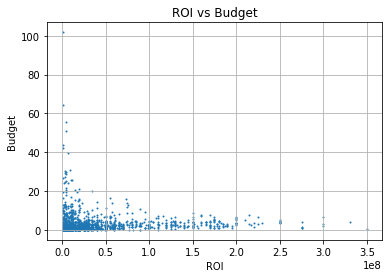

In [37]:
#ROI vs Budget
plt.title("ROI vs Budget")
plt.xlabel("ROI")
plt.ylabel("Budget")

plt.grid()

plt.scatter(df2["budget"], df2["roi"], s=1)
plt.show()

Somehow, a movie made over 100 times its money back, despite it having a budget of at least 700,000 dollars.

In [38]:
#The highest returns on investment?
df2.sort_values("roi", ascending=False).head(15)

,movie,directors,budget,world_gross,net_profit,roi,runtime_minutes,year,genres,Action,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
1364,The Devil Inside,William Brent Bell,1000000,101759490,100759490,101.759490,NaN,2012,"Horror,Thriller",0,...,1,0,0,0,0,0,0,1,0,0
1366,Unfriended,Levan Gabriadze,1000000,64364198,63364198,64.364198,83.0,2015,"Horror,Mystery,Thriller",0,...,1,0,0,1,0,0,0,1,0,0
1091,Split,Lawrence Côté-Collins,5000000,278964806,273964806,55.792961,90.0,2017,"Comedy,Romance,Sport",0,...,0,0,0,0,1,0,1,0,0,0
1090,Get Out,NaN,5000000,255367951,250367951,51.073590,104.0,2017,"Horror,Mystery,Thriller",0,...,1,0,0,1,0,0,0,1,0,0
1319,Moonlight,Barry Jenkins,1500000,65245512,63745512,43.497008,111.0,2016,Drama,0,...,0,0,0,0,0,0,0,0,0,0
1368,Chernobyl Diaries,Bradley Parker,1000000,42411721,41411721,42.411721,86.0,2012,"Horror,Mystery,Thriller",0,...,1,0,0,1,0,0,0,1,0,0
1066,Annabelle,John R. Leonetti,6500000,256862920,250362920,39.517372,99.0,2014,"Horror,Mystery,Thriller",0,...,1,0,0,1,0,0,0,1,0,0
994,Dangal,Nitesh Tiwari,9500000,294654618,285154618,31.016276,161.0,2016,"Action,Biography,Drama",1,...,0,0,0,0,0,0,0,0,0,0
1211,The Purge,James DeMonaco,3000000,91266581,88266581,30.422194,85.0,2013,"Horror,Thriller",0,...,1,0,0,0,0,0,0,1,0,0
1096,Lights Out,David F. Sandberg,5000000,148806510,143806510,29.761302,NaN,2016,Drama,0,...,0,0,0,0,0,0,0,0,0,0


Impressive, but those at the extreme ends will mess with our means too much.

In [39]:
df2["roi"].describe()

count    1300.000000
mean        3.340278
std         5.862164
min         0.000000
25%         0.479576
50%         1.898908
75%         3.943571
max       101.759490
Name: roi, dtype: float64

Since the data is very much not a normal distribution,  I don't know the best way to really define an outlier. The early-high school approach of "3rd quartile + IQR" feels really inappropriate. It would discount any movies that made more than 7.4 times their budget and that is...

In [40]:
print("There are " + str(len(df2)) + " total movies in our sample")
print("And there are " + str(len(df2[df2["roi"] >= 7.4])) + " movies that made 7.4 times their money back")
print("So " + str(100*(len(df2[df2["roi"] >= 7.4])/(len(df2)))) + " percent of movies cross this threshold")

There are 1300 total movies in our sample
And there are 130 movies that made 7.4 times their money back
So 10.0 percent of movies cross this threshold


10% is far too high. Instead, I'm going to cut off any movies more than 3 standard deviations away from the mean: those making 20.9263 times its budget

In [41]:
print("There are " + str(len(df2[df2["roi"] >= 20.9263])) + " movies that made roughly 21 times their money back")
print("That's " + str(100*(len(df2[df2["roi"] >= 20.9263])/(len(df2)))) + " percent of movies cross this threshold")

There are 22 movies that made roughly 21 times their money back
That's 1.6923076923076923 percent of movies cross this threshold


Much better. Finally I have my dataset.

In [42]:
base_df = df2[df2["roi"] < 20.9263]


# Results

It's results time! First, let's see if there is any strong evidence that Microsoft should pump more money in to see greater proportionate returns.


### Budget


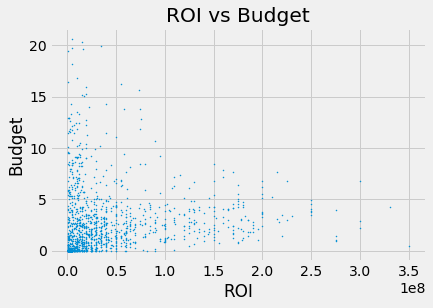

In [43]:
#Visualizing my new dataset
plt.style.use("fivethirtyeight")
plt.grid(axis='both')
plt.title("ROI vs Budget")
plt.xlabel("ROI")
plt.ylabel("Budget")

plt.grid()

plt.scatter(base_df["budget"], base_df["roi"], s=1)
plt.show()

In [44]:
#Correlation Coefficient
base_df['roi'].corr(base_df['budget'])

0.07451109058574067

It doesn't seem that way at all. I suppose putting money in just means you see the same size slice of that money come back. At least that means all the money it costs to pay VFX artists to do a good job instead of a rushjob could come back around in the end.


### Runtime

Since I have the data, I might as well check to see if movie length happens to have anything interesting to say.

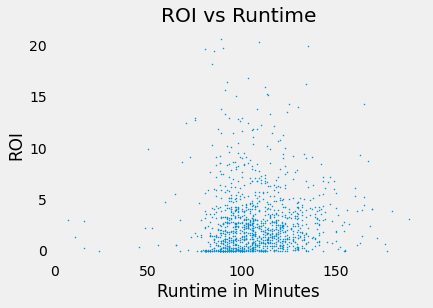

In [45]:
plt.style.use("fivethirtyeight")
plt.grid(axis="both")
plt.title("ROI vs Runtime")
plt.xlabel("Runtime in Minutes")
plt.ylabel("ROI")


plt.scatter(base_df["runtime_minutes"], base_df["roi"], s=1)
plt.show()

In [46]:
#Correlation Coefficient
base_df['roi'].corr(base_df['runtime_minutes'])

0.05742816069088249

As it turns out, it does not. Not unless Microsoft was  somehow in any danger of making a 30 minute movie.


### Directors

The sample size for each director is low at this stage. So I will try and account for the effect one outlier may have on their resume moving forward.

In [47]:
#Net Profit Mean
base_df.groupby("directors").mean().sort_values("net_profit", ascending = False).head()

,budget,world_gross,net_profit,roi,runtime_minutes,year,Action,Adventure,Animation,Biography,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
directors,,,,,,,,,,,,,,,,,,,,,
Joss Whedon,277800000.0,1.460475e+09,1.182675e+09,5.495112,142.0,2013.5,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
Adam Green,150000000.0,1.272470e+09,1.122470e+09,8.483133,93.0,2013.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
The Russos,240000000.0,1.300869e+09,1.060869e+09,5.196585,144.0,2016.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
Sam Mendes,250000000.0,9.950740e+08,7.450740e+08,4.242352,145.5,2013.5,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Tim Miller,58000000.0,8.010256e+08,7.430256e+08,13.810786,108.0,2016.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Some recognizable names in there.

In [48]:
#ROI Median
base_df.groupby("directors").median().sort_values("roi", ascending = False).head()

,budget,world_gross,net_profit,roi,runtime_minutes,year,Action,Adventure,Animation,Biography,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
directors,,,,,,,,,,,,,,,,,,,,,
Andy Muschietti,35000000.0,697457969.0,662457969.0,19.927371,135.0,2017.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Adam Robitel,10000000.0,167885588.0,157885588.0,16.788559,103.0,2018.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
Stephen Susco,1000000.0,16434588.0,15434588.0,16.434588,92.0,2018.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Sam Taylor-Johnson,40000000.0,570998101.0,530998101.0,14.274953,125.0,2015.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
Peter Farrelly,23000000.0,322034439.0,299034439.0,14.001497,130.0,2018.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


I've never heard of any of these guys. Odd.

In [49]:
#Mean ROI
base_df.groupby("directors").mean().sort_values("roi", ascending = False).head()

,budget,world_gross,net_profit,roi,runtime_minutes,year,Action,Adventure,Animation,Biography,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
directors,,,,,,,,,,,,,,,,,,,,,
Andy Muschietti,35000000.0,697457969.0,662457969.0,19.927371,135.0,2017.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Adam Robitel,10000000.0,167885588.0,157885588.0,16.788559,103.0,2018.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
Stephen Susco,1000000.0,16434588.0,15434588.0,16.434588,92.0,2018.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Sam Taylor-Johnson,40000000.0,570998101.0,530998101.0,14.274953,125.0,2015.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
Peter Farrelly,23000000.0,322034439.0,299034439.0,14.001497,130.0,2018.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Awkward.
The top 5 directors by both mean and median ROI are the same 5 people and are all in the same order. It turns out that's because each of them have only one movie to their name, and it's a movie that they were lucky enough to have do well. 

For Microsoft's first foray into the movie business, I'm going to look only for people with a bit of a track record.

In [50]:
#Just directors with 3 or more movies under their belt over the last decade
top_direct = base_df.groupby('directors').filter(lambda x: len(x) > 2)

In [51]:
#Let's try this one more time
#ROI Median
top_direct.groupby("directors").median().sort_values("roi", ascending = False).head(15)

,budget,world_gross,net_profit,roi,runtime_minutes,year,Action,Adventure,Animation,Biography,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
directors,,,,,,,,,,,,,,,,,,,,,
John Madden,10000000.0,9.038431e+07,80384306.0,9.038431,124.0,2015.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Richard Linklater,4000000.0,2.325193e+07,20251930.0,7.750643,109.0,2013.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Christopher Landon,9000000.0,6.417950e+07,55179495.0,7.131055,93.0,2015.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Ryan Coogler,37000000.0,1.735676e+08,136567581.0,6.741291,85.0,2015.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Genndy Tartakovsky,80000000.0,4.695003e+08,389500298.0,5.868754,91.0,2015.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Kenneth Branagh,60000000.0,3.459227e+08,290922730.0,5.626856,114.0,2015.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Francis Lawrence,127500000.0,7.077810e+08,565280959.0,5.094384,138.5,2014.5,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
Wes Ball,61000000.0,3.105662e+08,249566162.0,5.091249,131.0,2015.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
F. Gary Gray,110000000.0,2.021830e+08,174182981.0,4.939385,136.0,2017.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
#ROI Mean
top_direct.groupby("directors").mean().sort_values("roi", ascending = False).head(15)

,budget,world_gross,net_profit,roi,runtime_minutes,year,Action,Adventure,Animation,Biography,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
directors,,,,,,,,,,,,,,,,,,,,,
Ryan Coogler,7.930000e+07,5.131252e+08,4.338252e+08,10.310637,98.666667,2015.333333,0.333333,0.333333,0.0,0.333333,...,0.333333,0.000000,0.000000,0.000000,0.333333,0.333333,0.0,0.000000,0.0,0.0
Christopher Landon,9.666667e+06,5.687973e+07,4.721307e+07,8.783005,92.333333,2016.000000,0.333333,0.000000,0.0,0.000000,...,1.000000,0.000000,0.000000,0.666667,0.000000,0.000000,0.0,0.333333,0.0,0.0
Richard Linklater,4.333333e+06,3.021065e+07,2.587732e+07,7.917800,124.333333,2013.000000,0.000000,0.000000,0.0,0.333333,...,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.0,0.000000,0.0,0.0
John Madden,1.266667e+07,7.758124e+07,6.491457e+07,7.643759,126.000000,2014.333333,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.0,0.333333,0.0,0.0
Morten Tyldum,4.341667e+07,1.833896e+08,1.399730e+08,7.258602,108.666667,2014.000000,0.333333,0.000000,0.0,0.333333,...,0.000000,0.000000,0.000000,0.000000,0.333333,0.333333,0.0,0.666667,0.0,0.0
Nicholas Stoller,2.766667e+07,1.471086e+08,1.194420e+08,6.737985,104.333333,2014.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.0,0.000000,0.0,0.0
Wes Ball,5.200000e+07,3.082549e+08,2.562549e+08,6.564872,129.000000,2015.666667,1.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.333333,0.000000,1.000000,0.0,0.666667,0.0,0.0
Genndy Tartakovsky,7.666667e+07,4.583620e+08,3.816954e+08,6.143562,92.333333,2015.000000,0.000000,0.333333,1.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0
Bryan Singer,1.570000e+08,5.957683e+08,4.387683e+08,6.018380,131.000000,2015.250000,0.500000,0.750000,0.0,0.250000,...,0.000000,0.250000,0.000000,0.000000,0.000000,0.500000,0.0,0.000000,0.0,0.0


That list looks promising. I'll delve into that a little more in a moment.


### Genres

The samples for each genre are usually fairly large, so the mean will be a bit more of a useful number to use than I had with directors. There are a couple of genres that the samples are low on though, like Westerns.

No matter what, I could use a sortable DataFrame just for genres. I could have used the transpose() function but went with the following approach instead.

In [53]:
#Preparing lists of the data that my DF's columns will be populated with
#Mean and median ROI and net profits, as well as # of movies per genre
g_roi_mean = []
g_roi_median = []
g_net_mean = []
g_net_median = []
g_count = []
#Filling those lists
for genre in genres:
    g_roi_mean.append(base_df[base_df[genre] == 1]["roi"].mean())
    g_roi_median.append(base_df[base_df[genre] == 1]["roi"].median())
    g_net_mean.append(base_df[base_df[genre] == 1]["net_profit"].mean())
    g_net_median.append(base_df[base_df[genre] == 1]["net_profit"].median())
    g_count.append(len(base_df[base_df[genre] ==1]))

In [54]:
#Birthing the genre DataFrame
df_g = pd.DataFrame()
df_g["genre"] = genres
df_g["count"] = g_count
df_g["roi_mean"] = g_roi_mean
df_g["roi_median"] = g_roi_median
df_g["net_mean"] = g_net_mean
df_g["net_median"] = g_net_median
#Some not-so-well-educated guesses for some numbers I can consider
df_g["roixroi"] = df_g["roi_mean"]*df_g["roi_median"]
df_g["roisxnet_mean"] = df_g["roixroi"]*df_g["net_mean"]
df_g["roisxnet_median"] = df_g["roixroi"]*df_g["net_median"]

In [55]:
df_g

,genre,count,roi_mean,roi_median,net_mean,net_median,roixroi,roisxnet_mean,roisxnet_median
0,Action,364,2.563720,2.098471,1.590534e+08,49100635.5,5.379891,8.556900e+08,2.641561e+08
1,Adventure,299,2.991108,2.433886,2.264624e+08,110859554.0,7.280017,1.648650e+09,8.070594e+08
2,Animation,85,3.467539,2.753201,2.389442e+08,151091610.0,9.546831,2.281160e+09,1.442446e+09
3,Biography,129,3.032131,1.753397,4.927148e+07,11187026.0,5.316530,2.619533e+08,5.947615e+07
4,Comedy,398,3.123753,2.464386,9.106072e+07,28527406.0,7.698134,7.009976e+08,2.196078e+08
5,Crime,204,2.014780,1.326145,3.771083e+07,6199163.0,2.671891,1.007592e+08,1.656349e+07
6,Documentary,47,2.844449,1.498421,2.557194e+07,3015686.0,4.262180,1.089922e+08,1.285340e+07
7,Drama,633,2.551275,1.474799,4.033740e+07,5733666.0,3.762619,1.517743e+08,2.157360e+07
8,Family,67,2.617101,2.029438,1.261528e+08,30401882.0,5.311244,6.700284e+08,1.614718e+08
9,Fantasy,95,2.778872,2.036885,1.543628e+08,46209222.0,5.660242,8.737310e+08,2.615554e+08


By the way, before the outliers were removed, Horror movies had a stunning mean ROI of over 6. Now they're a more believable 3.5. 

And look at Musicals! They sport surprisingly high ROI (mean and median), but have only 8 representatives. Even the lowly Western genre has them beat by number of appearances on the big screen. I guess Disney doesn't make them like they used to.


## Zeroing In

To determine the best genres, I ignored those with fewer than 30 movies left in my sample (Musical, Western, and War). I then looked at their ROIs, even using the product of mean and median ROI to at least give me some way of comparing/weighing both numbers at once. The genres that stood head and shoulders above the rest here were *Animation, Sci-Fi, Comedy, and Adventure*. If I included net profit in that product, then *Action and Fantasy* sneak in too.

To [quote](https://tvtropes.org/pmwiki/pmwiki.php/Creator/BradBird#:~:text=%22It's%20not%20a%20genre!,or%20a%20kids'%20fairy%20tale.) Brad Bird (director of [The Incredibles](https://en.wikipedia.org/wiki/The_Incredibles)), animation is not truly a genre but a medium. So for animated movies, I'm really judging their fertility versus live action. The results? Their average ROI is 3.5 while the average ROI in general over this sample is 2.7 (just 78.7% as good). A devastatingly strong case for Animation.

In [56]:
#Isolating animated movies' and live action movies'
live_mean_roi = base_df[base_df["Animation"] == 0]["roi"].mean()
ani_mean_roi = base_df[base_df["Animation"] == 1]["roi"].mean()

<BarContainer object of 2 artists>

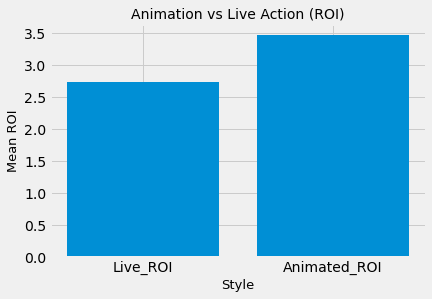

In [57]:
#Creating a bar plot to show how well each type of movie does
plt.xlabel("Style", fontsize=13)
plt.ylabel("Mean ROI", fontsize=13)
plt.title("Animation vs Live Action (ROI)", fontsize=14)
plt.bar(["Live_ROI", "Animated_ROI"], [live_mean_roi, ani_mean_roi])

For directors, it seemed a little inappropriate to multiply their mean and median output, since everyone in this truncated sample has exactly three movies to their name (effectively squaring the median movie's effect on the data). But using either that approach or just selecting names that appeared in the top 15 of both lists, 6 directors stood out: Christopher Landon, Genndy Tartakovsky, John Madden, Richard Linklater, Ryan Coogler, and Wes Ball. 

I also decided to make an executive decision to additionally include the Russos. They were just shy of qualifying for the above list, while having directed 2 of the 3 highest grossing movies of all time. Their association with the Marvel brand could be both a blessing and a curse, but Endgame+Infinity War are bona fide cultural touchstones at this point.

In [58]:
#Just the finalists
top7 = top_direct[top_direct["directors"].isin(["Ryan Coogler", "Richard Linklater", "The Russos",
          "Genndy Tartakovsky", "Christopher Landon", "Wes Ball", "John Madden"])]
top7

,movie,directors,budget,world_gross,net_profit,roi,runtime_minutes,year,genres,Action,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
2,Avengers: Infinity War,The Russos,300000000,2048134200,1748134200,6.827114,149.0,2018,"Action,Adventure,Sci-Fi",1,...,0,0,0,0,0,1,0,0,0,0
9,Captain America: Civil War,The Russos,250000000,1140069413,890069413,4.560278,147.0,2016,"Action,Adventure,Sci-Fi",1,...,0,0,0,0,0,1,0,0,0,0
27,Black Panther,Ryan Coogler,200000000,1348258224,1148258224,6.741291,134.0,2018,"Action,Adventure,Sci-Fi",1,...,0,0,0,0,0,1,0,0,0,0
70,Captain America: The Winter Soldier,The Russos,170000000,714401889,544401889,4.202364,136.0,2014,"Action,Adventure,Sci-Fi",1,...,0,0,0,0,0,1,0,0,0,0
212,Hotel Transylvania,Genndy Tartakovsky,85000000,378505812,293505812,4.453010,91.0,2012,"Animation,Comedy,Family",0,...,0,0,0,0,0,0,0,0,0,0
222,Hotel Transylvania 2,Genndy Tartakovsky,80000000,469500298,389500298,5.868754,89.0,2015,"Animation,Comedy,Family",0,...,0,0,0,0,0,0,0,0,0,0
263,Hotel Transylvania 3: Summer Vacation,Genndy Tartakovsky,65000000,527079962,462079962,8.108922,97.0,2018,"Adventure,Animation,Comedy",0,...,0,0,0,0,0,0,0,0,0,0
279,Maze Runner: The Scorch Trials,Wes Ball,61000000,310566162,249566162,5.091249,131.0,2015,"Action,Sci-Fi,Thriller",1,...,0,0,0,0,0,1,0,1,0,0
281,Maze Runner: The Death Cure,Wes Ball,61000000,265878536,204878536,4.358665,143.0,2018,"Action,Sci-Fi,Thriller",1,...,0,0,0,0,0,1,0,1,0,0
461,Creed,Ryan Coogler,37000000,173567581,136567581,4.691016,77.0,2015,Horror,0,...,1,0,0,0,0,0,0,0,0,0


How much experience do these men have with the genres we care about most? And what kinds of movies are the known for?

Christopher Landon has 1 Comedy Action movie.
But he specializes in the Horror genre.

Genndy Tartakovsky has 3 Animated Comedies, 1 of which was labeled an Adventure. Those 3 are what he's known for: The Hotel Transylvania series. Which barely average a Rotten Tomatoes score over 50%.

John Madden has 2 Comedies. His movies are relatively obscure, with both of his larger movies seeing most of their success in the UK and only having had limited release in the USA.

Richard Linklater has 1 Comedy. I haven't heard of any of his most recent output As such, I don't know how confident I'd be to let him helm something else. 

The Russos have 3 Sci-Fi Adventure Action movies. They have far and away the most success, but given the unparalleled momentum they were able to piggyback on from the Marvel supergiant it's possible they can be considered untested with new material.

Wes Ball has 3 Sci-Fi Action movies. These are all from the Maze Runner series.  "Young-adult post-apocalyptic movies" carry with them a miserable stigma in the general public nowadays.

Ryan Coogler has 1 Sci-Fi Action Adventure. Amazingly, he has no obvious blemishes on his record. Black Panther, Creed, and Fruitvale Station are all generally well-regarded (even though I personally don't like Black Panther), span different genres, and each of them star the popular Michael B. Jordan. If he can bring this superstar in for the project, we have seeds for success.

(Creed, the successor to the Rocky franchise, is somehow categorized as a Horror movie. However, it seems to be the only Horror movie in the wrong place. Phew. I guess its genre ID  was a typo.)


# In conclusion, 

I would first recommend that Microsoft prioritize making an Animated movie. Even though the directors I looked at are successful, their samples are very limited and thus harder to trust to put as the primary concern. Across nearly 100 animated movies, the trend of animation outperforming live action seems robust.

The samples for the various genres are also large and seemingly trustworthy. So I'd next prioritize making sure the movie is a Sci Fi Adventure. Comedy and Action are valuable suggestions, but not needed.

Finally, I would reach out to Ryan Coogler. If he turns it down, then I would ask the Russos the same question. If that fails, I would make an offer to Genndy Tartakovski (the only director on the short list to make even one animated film). But since Family movies like Genndy's have mediocre performances, if it came down to him, ask him to lean away from that.